### 1. 주요 함수
- 통계 함수
   - df.cumsum(), df.cumprod()
   - df.corr() : 상관계수
- pd.to_datetime()   
- pd.merge()
- pd.concat()
- df.groupby()
- df.pivot_table()
- df.apply(function)

In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [2]:
# 이상치 (Outlier) - 연속형 데이터
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

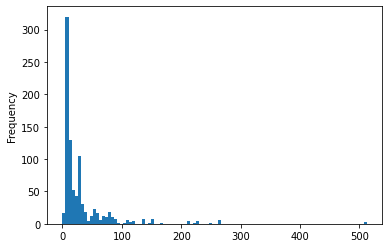

In [6]:
import matplotlib.pyplot as plt

# 양의 왜도
df['fare'].plot.hist(bins=100)
plt.show()

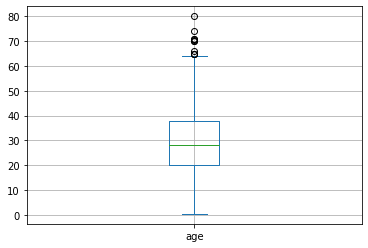

In [11]:
# boxplot - 이상치를 시각적으로 확인
df['age'].plot.box(grid=True)
plt.show()

In [12]:
# 이상치 구하기 (IQR)
Q1, Q3 = df['age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_f = Q1 - 1.5*IQR   # value < lower_f
upper_f = Q3 + 1.5*IQR   # value > upper_f
print(lower_f, upper_f)

-6.6875 64.8125


In [13]:
# 이상치 구하기 (3 * std) : 정규분포, 정규분포에서 3*std 내부에 99.7% 데이터가 존재
std = df['age'].std()
mean = df['age'].mean()
lower_f = mean - 3 * std   # value < lower_f
upper_f = mean + 3 * std   # value > upper_f
print(lower_f, upper_f)

-13.880374349943303 73.27860964406094


In [15]:
# 누적합 (P219)
df['fare'].cumsum()

0          7.2500
1         78.5333
2         86.4583
3        139.5583
4        147.6083
          ...    
886    28602.7493
887    28632.7493
888    28656.1993
889    28686.1993
890    28693.9493
Name: fare, Length: 891, dtype: float64

In [17]:
# 누적곱 (P219)
df['age'].cumprod()

C:\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


0            22.0
1           836.0
2         21736.0
3        760760.0
4      26626600.0
          ...    
886           inf
887           inf
888           NaN
889           inf
890           inf
Name: age, Length: 891, dtype: float64

In [18]:
# 상관계수 - 매우 중요  (P225)
# 두 변수의 선형성 정도
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [21]:
df2 = df[['survived', 'adult_male', 'alone', 'pclass']]
df2.corr()

# survived = 0, 1 (사망, 생존)
# alone = 0, 1 (동행이 있음, 동행이 없음)
# adult_male = 0, 1 (성인남성 아님, 성인남성임)
# -1, 1 : 완전 상관
# 절대값이 0.7 보다 크면 : 상당히 큰 관계가 있음
# -0.1 ~ 0.1 : 거의 상관 없음 (선형 관계 없음)

,survived,adult_male,alone,pclass
survived,1.000000,-0.557080,-0.203367,-0.338481
adult_male,-0.557080,1.000000,0.404744,0.094035
alone,-0.203367,0.404744,1.000000,0.135207
pclass,-0.338481,0.094035,0.135207,1.000000


### pd.to_datetime()  P207
- pandas.to_datetime(arg, ... **format=None**,...)

In [24]:
import pandas as pd
date = pd.DataFrame({'year': [2020, 2019, 2019],
                    'month':[1, 2, 3],
                    'day':[1, 2, 3]})
date

,year,month,day
0,2020,1,1
1,2019,2,2
2,2019,3,3


In [25]:
pd.to_datetime(date)

0   2020-01-01
1   2019-02-02
2   2019-03-03
dtype: datetime64[ns]

In [26]:
s = pd.Series(['2020-01-01', '2019-02-02', '2019-03-03'])
s

0    2020-01-01
1    2019-02-02
2    2019-03-03
dtype: object

In [27]:
pd.to_datetime(s)

0   2020-01-01
1   2019-02-02
2   2019-03-03
dtype: datetime64[ns]

In [28]:
s.astype('datetime64')

0   2020-01-01
1   2019-02-02
2   2019-03-03
dtype: datetime64[ns]

In [29]:
s = pd.Series(['221017', '221018', '221019'])
s

0    221017
1    221018
2    221019
dtype: object

In [30]:
s.astype('datetime64')

0   2017-10-22
1   2018-10-22
2   2019-10-22
dtype: datetime64[ns]

In [35]:
# datetime 타입의 dt accessor 를 사용해 정보를 추출할 수 있음
A = pd.to_datetime(s, format='%y%m%d')
date = pd.DataFrame()
date['year'] = A.dt.year
date['month'] = A.dt.month
date['day'] = A.dt.day
date

,year,month,day
0,2022,10,17
1,2022,10,18
2,2022,10,19


### pd.merge(), pd.concat()  - P226

- pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
  - 여러개를 1개의 DataFrame으로 합치기 (index 기준)
  - axis=0 : columns 이 같을 때 사용 
  - axis=1 : index 가 같을 때 사용
  - ignore_index : True 일 경우 index/columns를 무시하고 새롭게 생성을 의미

In [40]:
df1 = pd.DataFrame({
    'K':['K0', 'K1', 'K2'],
    'X2':['A', 'B', 'A'],
    'X3':[1, 2, 3] })
df2 = pd.DataFrame({
    'K':['K1', 'K2', 'K3'],
    'X3':[4, 5, 6],
    'X4':['B', 'A', 'B'] })
display(df1, df2)

,K,X2,X3
0,K0,A,1
1,K1,B,2
2,K2,A,3


,K,X3,X4
0,K1,4,B
1,K2,5,A
2,K3,6,B


In [41]:
pd.concat([df1, df2], axis=0, join='outer')

,K,X2,X3,X4
0,K0,A,1,NaN
1,K1,B,2,NaN
2,K2,A,3,NaN
0,K1,NaN,4,B
1,K2,NaN,5,A
2,K3,NaN,6,B


In [48]:
dfDict = pd.read_excel('data_3.xlsx', sheet_name=None)
pd.concat(dfDict.values(), axis=0).head(2)

,Unnamed: 0,A,B,C,D
0,0,A,3,1,X
1,1,A,1,2,X


In [44]:
pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)

,K,X3
0,K0,1
1,K1,2
2,K2,3
3,K1,4
4,K2,5
5,K3,6


In [49]:
pd.concat([df1, df2], axis=1, join='outer')

,K,X2,X3,K,X3,X4
0,K0,A,1,K1,4,B
1,K1,B,2,K2,5,A
2,K2,A,3,K3,6,B


- pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
  - 2개의 DataFrame을 1개로 병합
  - left, right 라는 2개의 DataFrame을 on (양쪽이 같은 열이름일 경우), left_on, right_on (다른 열이름일 경우)
  - left_index, right_index 는 True를 하면 index 기준으로 병합 하는 것을 의미

In [52]:
display(df1, df2)

,K,X2,X3
0,K0,A,1
1,K1,B,2
2,K2,A,3


,K,X3,X4
0,K1,4,B
1,K2,5,A
2,K3,6,B


In [53]:
pd.merge(df1, df2, on='K', how='inner')

,K,X2,X3_x,X3_y,X4
0,K1,B,2,4,B
1,K2,A,3,5,A


In [54]:
pd.merge(df1, df2, on='K', how='outer')

,K,X2,X3_x,X3_y,X4
0,K0,A,1.0,NaN,NaN
1,K1,B,2.0,4.0,B
2,K2,A,3.0,5.0,A
3,K3,NaN,NaN,6.0,B


In [55]:
# df1에 있는 것은 모두 포함, df2 는 df1 과 겹치는 것만 
pd.merge(df1, df2, on='K', how='left')

,K,X2,X3_x,X3_y,X4
0,K0,A,1,NaN,NaN
1,K1,B,2,4.0,B
2,K2,A,3,5.0,A


In [56]:
# df2에 있는 것은 모두 포함, df1 는 df2 과 겹치는 것만 
pd.merge(df1, df2, on='K', how='right')

,K,X2,X3_x,X3_y,X4
0,K1,B,2.0,4,B
1,K2,A,3.0,5,A
2,K3,NaN,NaN,6,B


### df.apply(function)  -교재 없음
- DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)
- 함수를 적용

In [58]:
import numpy as np
df = pd.DataFrame(np.arange(1, 10).reshape(3, -1), index=list("ABC"), columns=['X', 'Y', 'Z'])
df

,X,Y,Z
A,1,2,3
B,4,5,6
C,7,8,9


In [64]:
def function(s):
    return s['X'] if s['X'] % 2 == 0 else s['Y']
    
#df.apply(lambda x : print(x), axis=1)
df['even'] = df.apply(function, axis=1)
df

,X,Y,Z,even
A,1,2,3,2
B,4,5,6,4
C,7,8,9,8


- df.groupby()
- df.pivot_table()

In [ ]:
# 데이터 - 종류
# 연속형 - 키, 몸무게, 기온, 나이
# 범주형 (이산형) - 혈액형(A, B, O, AB -> 0, 1, 2, 3), 올림픽 메달의 종류(금,은,동 -> 0, 1, 2), 성별, 월, 년도 
#                 - ML 알고리즘(사칙연산을 통해 학습)

# 키 예측! - 영향을 주는(유의미한) 변수(값) 선택

In [15]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': list('AAABBBCCC'),
    'B': [3,1,0,1,7,3,2,1,3],
    'C': [1,2,5,6,2,3,4,1,2]
})
df

,A,B,C
0,A,3,1
1,A,1,2
2,A,0,5
3,B,1,6
4,B,7,2
5,B,3,3
6,C,2,4
7,C,1,1
8,C,3,2


In [14]:
# split -> DataFrameGroupBy
temp = df.groupby(by='A')
#dir(temp)  # '__iter__'
for group_name, df_temp in temp:
    display(group_name, df_temp)

'A'

,A,B,C
0,A,3,1
1,A,1,2
2,A,0,5


'B'

,A,B,C
3,B,1,6
4,B,7,2
5,B,3,3


'C'

,A,B,C
6,C,2,4
7,C,1,1
8,C,3,2


In [11]:
temp.get_group('B')

,A,B,C
3,B,1,6
4,B,7,2
5,B,3,3


In [16]:
# 'A' 컬럼의 범주별 평균 구하기
df.groupby(by='A').mean()

,B,C
A,,
A,1.333333,2.666667
B,3.666667,3.666667
C,2.000000,2.333333


In [17]:
# 'A' 컬럼의 범주별 최소값 구하기 - 가능한 모든 컬럼
df.groupby(by='A').min()

,B,C
A,,
A,0,1
B,1,2
C,1,1


In [27]:
# 'A' 컬럼의 범주별, 'B', 'C' 컬럼 평균 구하기 - 컬럼을 'B', 'C'로 제한
df.groupby(by='A')[['B','C']].mean().reset_index().round(3)

,A,B,C
0,A,1.333,2.667
1,B,3.667,3.667
2,C,2.000,2.333


In [20]:
# 'A' 컬럼의 범주별 'B' 컬럼의 합계 구하기 -> Series
df.groupby(by='A')['B'].sum()

A
A     4
B    11
C     6
Name: B, dtype: int64

In [21]:
# 'A' 컬럼의 범주별 'B' 컬럼의 합계 구하기 -> DataFrame
df.groupby(by='A')[['B']].sum()

,B
A,
A,4
B,11
C,6


In [24]:
# 'A' 컬럼의 범주별 'B' 컬럼의 합계 구하기 -> DataFrame
# index -> columns로 가져오기 df.reset_index()
df.groupby(by='A')[['B']].sum().reset_index(['A'])

,A,B
0,A,4
1,B,11
2,C,6


In [29]:
df.groupby(by='A').agg(np.sum)   # 'sum'

,B,C
A,,
A,4,8
B,11,11
C,6,7


In [30]:
df.groupby(by='A').agg(['sum', 'mean']) 

B             C          
  sum      mean sum      mean
A                            
A   4  1.333333   8  2.666667
B  11  3.666667  11  3.666667
C   6  2.000000   7  2.333333

In [ ]:
dir(temp)

In [32]:
df['D'] = list('XXYXYXXYX')
df

,A,B,C,D
0,A,3,1,X
1,A,1,2,X
2,A,0,5,Y
3,B,1,6,X
4,B,7,2,Y
5,B,3,3,X
6,C,2,4,X
7,C,1,1,Y
8,C,3,2,X


In [35]:
df.groupby(by=['A', 'D']).sum()#.reset_index()

B  C
A D      
A X  4  3
  Y  0  5
B X  4  9
  Y  7  2
C X  5  6
  Y  1  1

In [36]:
# 행(index) 은 'A'컬럼, 열(columns)는 'D'컬럼, 'B'컬럼의 합계
df.pivot_table(index='A', columns='D', values='B', aggfunc='sum')

D,X,Y
A,,
A,4,0
B,4,7
C,5,1


In [37]:
# 행(index) 은 'A'컬럼, 열(columns)는 'D'컬럼, 'B'컬럼의 합계
df.pivot_table(index='A', columns='D', values=['B', 'C'], aggfunc='sum')

B     C   
D  X  Y  X  Y
A            
A  4  0  3  5
B  4  7  9  2
C  5  1  6  1

In [39]:
df.pivot_table(index=['A', 'D'], values='B', aggfunc='mean')

B
A D     
A X  2.0
  Y  0.0
B X  2.0
  Y  7.0
C X  2.5
  Y  1.0

In [47]:
df.groupby(by=['A', 'D'])[['B']].mean()

B
A D     
A X  2.0
  Y  0.0
B X  2.0
  Y  7.0
C X  2.5
  Y  1.0

In [46]:
# 행(index) 은 'A'컬럼, 열(columns)는 'D'컬럼, 'B'컬럼의 평균
df.pivot_table(index='A', columns='D', values='B', aggfunc='mean')

D,X,Y
A,,
A,2.0,0.0
B,2.0,7.0
C,2.5,1.0


### 2. DataFrame 조작
- df.drop()
- df[컬럼명] = value
- df[컬럼명] = df['A'] + df['B']
- df.insert(loc,  컬럼명, value)

In [48]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': list('AAABBBCCC'),
    'B': [3,1,0,1,7,3,2,1,3],
    'C': [1,2,5,6,2,3,4,1,2]
})
df

,A,B,C
0,A,3,1
1,A,1,2
2,A,0,5
3,B,1,6
4,B,7,2
5,B,3,3
6,C,2,4
7,C,1,1
8,C,3,2


DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

In [51]:
# 컬럼 삭제
df.drop(['A'], axis=1).head(3)

,B,C
0,3,1
1,1,2
2,0,5


In [52]:
# 행 삭제
df.drop([0, 3], axis=0).head(3)

,A,B,C
1,A,1,2
2,A,0,5
4,B,7,2


In [54]:
# 'A' 컬럼 삭제
#df.drop(['A'], axis=1).head(3)
df.drop(columns=['A']).head(3)

,B,C
0,3,1
1,1,2
2,0,5


In [55]:
# 0, 3 label을 갖는 행 삭제
#df.drop([0, 3], axis=0).head(3)
df.drop(index=[0, 3]).head(3)

,A,B,C
1,A,1,2
2,A,0,5
4,B,7,2


### 3.Others
- pd.cut() : 연속데이터를 범주형데이터로 변환 (구간화)
- pd.date_range() : datetime64 타입의 데이터 생성

pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
- 과대적합 방지 기법
- 이상치 문제 해결 기법

In [59]:
# (0, 15], (15, 25], (25, 40]... (60, 100]: right=True
# [0, 15), [15, 25), [25, 40), ... [60, 100) : right=False

In [60]:
ages = [0, 0.1, 15, 10, 21, 23, 37, 100, 99, 101]   # 연속데이터
bins = [0, 15, 25, 40, 60, 100] # 범주 ()
labels = '어린이 청소년 청년 장년 노년'.split()
cuts = pd.cut(ages, bins, right=False, labels=labels)
# [NaN, '어린이', '어린이', '어린이', '청소년', '청소년', '청년', '노년', '노년', NaN] - right=True
# ['어린이', '어린이', '청소년', '어린이', '청소년', '청소년', '청년', NaN, '노년', NaN] - right=False
cuts

['어린이', '어린이', '청소년', '어린이', '청소년', '청소년', '청년', NaN, '노년', NaN]
Categories (5, object): ['어린이' < '청소년' < '청년' < '장년' < '노년']

In [3]:
pd.date_range('20200101', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [61]:
pd.date_range('20200101', '20201231', freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               ...
               '2020-12-30 23:59:51', '2020-12-30 23:59:52',
               '2020-12-30 23:59:53', '2020-12-30 23:59:54',
               '2020-12-30 23:59:55', '2020-12-30 23:59:56',
               '2020-12-30 23:59:57', '2020-12-30 23:59:58',
               '2020-12-30 23:59:59', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', length=31536001, freq='S')